# Denoising with the Fast Fourier Transform

As stated in the data description :
> The data is simulated and injected with real world noise to emulate what scientists observe in laboratory experiments.

So we might want to remove this noise to make the task easier. To do this, I use the Fast Fourier Transform.

*Source : https://www.kaggle.com/theoviel/fast-fourier-transform-denoising*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy.fft import *
# import pyarrow.parquet as pq
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("../input/train_clean.csv")
df_train.head()

time  signal  open_channels
0  0.0001 -2.7600              0
1  0.0002 -2.8557              0
2  0.0003 -2.4074              0
3  0.0004 -3.1404              0
4  0.0005 -3.1525              0

In [3]:
n_times = 1000
time = df_train['time'][:n_times].values
signal = df_train['signal'][:n_times].values

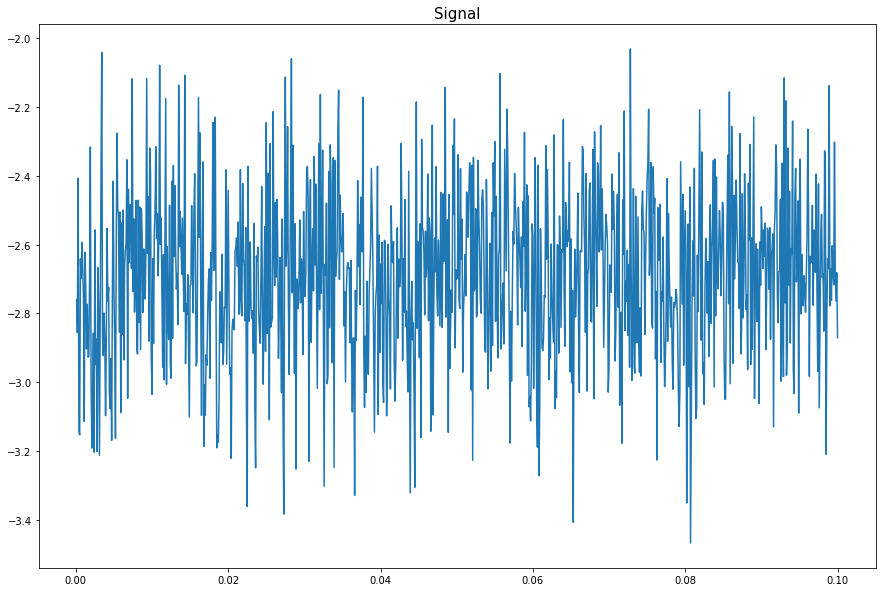

In [4]:
plt.figure(figsize=(15, 10))
plt.plot(time, signal)
plt.title('Signal', size=15)
plt.show()

# Fast Fourier Transform denoising

### A little bit of maths ...
The Fourier Transform of an 1D signal $x$ of length $n$ is the following : 

> ### $\mathscr{f}_j = \sum_{k=0}^{n-1} x_k e^{\frac{2\pi i}{n} jk} , ~~\forall j=0, ... , n-1$ 

The idea is to represent the signal in the complex space, It is roughly a sum of sinusoÃ¯dal functions. And there is one coefficient per frequency present in the signal.

The frequency takes the following values : 
- $f = \frac{1}{dn} [0, 1, \ldots ,   \frac{n}{2}-1,  -\frac{n}{2}, \ldots , -1] $  if $n$ is even
- $f =\frac{1}{dn}  [0, 1, \ldots,  \frac{n-1}{2}, -\frac{n-1}{2}, \ldots, -1] $   if $n$ is odd

### Denoising algorithm
The denoising steps are the following :
- Apply the fft to the signal
- Compute the frequencies associated with each coefficient
- Keep only the coefficients which have a low enough frequency (in absolute)
- Compute the inverse fft


In [5]:
def filter_signal(signal, threshold=1e8):
    fourier = rfft(signal)
    frequencies = rfftfreq(signal.size, d=1e-5)
    fourier[frequencies > threshold] = 0
    return irfft(fourier)

### Checking thresholds
The challenge is to pick a threshold correctly in order to keep useful frequencies, but still remove noise.

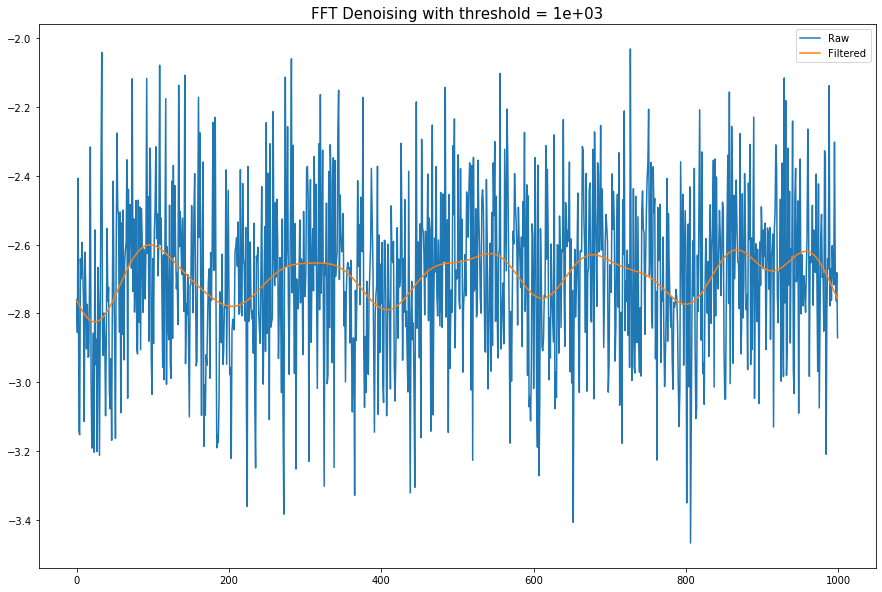

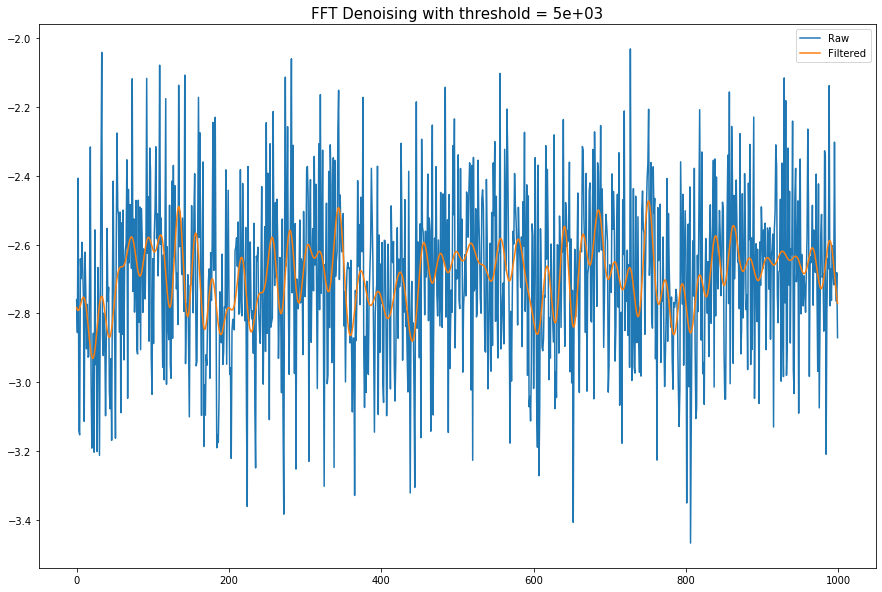

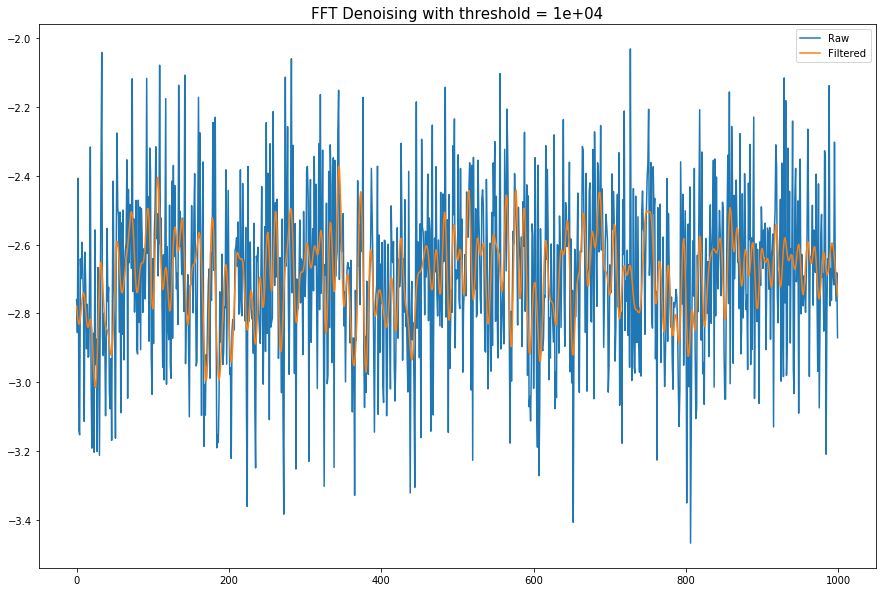

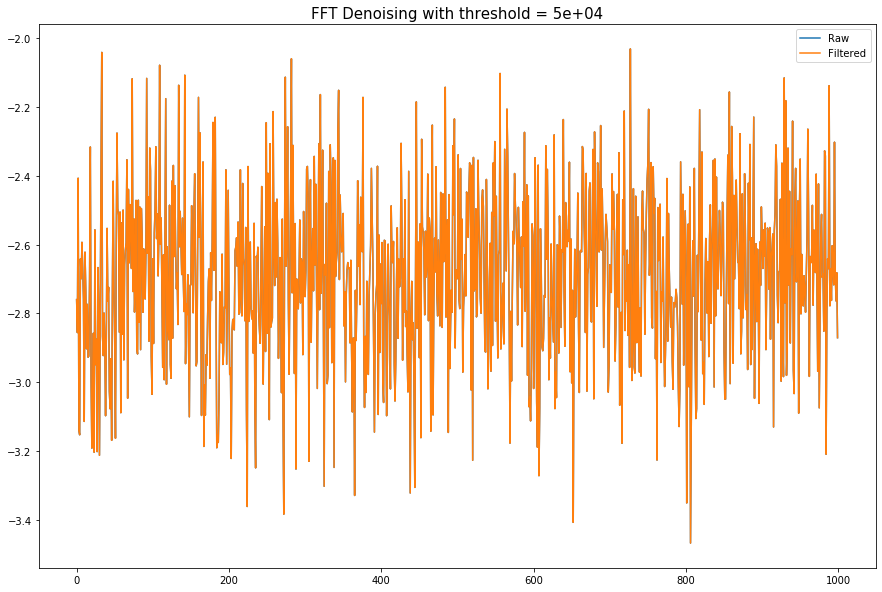

In [6]:
for threshold in [1e3, 5e3, 1e4, 5e4]:
    filtered = filter_signal(signal, threshold=threshold)

    plt.figure(figsize=(15, 10))
    plt.plot(signal, label='Raw')
    plt.plot(filtered, label='Filtered')
    plt.legend()
    plt.title(f"FFT Denoising with threshold = {threshold :.0e}", size=15)
    plt.show()

**Thanks for reading !**

I hope this can be somehow useful.